## 3.1 - Polynomial fits

In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

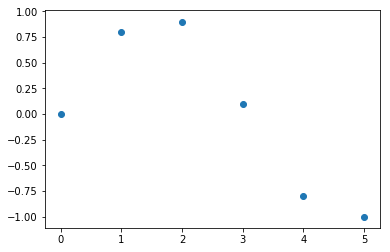

In [2]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
plt.scatter(x,y)
plt.show()

In [3]:
z = np.polyfit(x, y, 3)
print z

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


In [4]:
z = np.polyfit(x, y, 3)
p3 = np.poly1d(z)

In [5]:
z = np.polyfit(x, y, 30)
p30 = np.poly1d(z)

/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


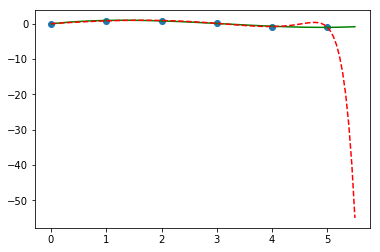

In [6]:
xp = np.linspace(-0,5.5,100)
plt.scatter(x,y)
plt.plot(xp, p3(xp), color='green')
plt.plot(xp, p30(xp), color='red', ls='--')
plt.show()

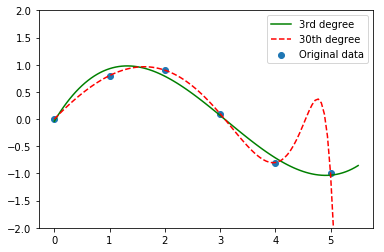

In [7]:
plt.scatter(x,y,label='Original data')
plt.plot(xp, p3(xp), color='green',label='3rd degree')
plt.plot(xp, p30(xp), color='red', ls='--', label='30th degree')
plt.ylim([-2,2])
plt.legend()
plt.show()

## 3.2 - Generic curve fitting

$$\Large{f(x) = a e^{-bx} + c}$$

In [34]:
def f(x, a, b, c):
    return a*np.exp(-b*x)+c

In [35]:
from scipy.optimize import *

In [38]:
x = np.linspace(0, 5, 50)
a = 5.0
b = 2.0
c = 0.5
arr = (a,b,c)

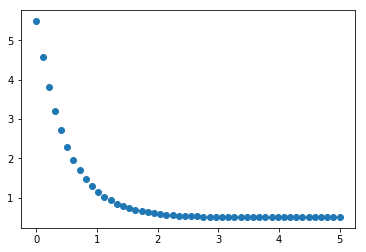

In [39]:
plt.scatter(x, f(x, *arr))
plt.show()

In [52]:
#Add some random noise
y_noise = f(x, *arr) + 0.3*np.random.normal(size=len(x))

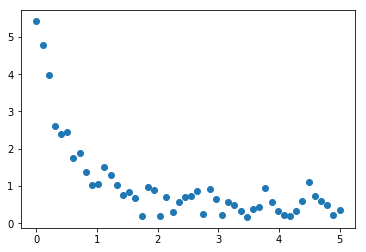

In [53]:
plt.scatter(x, y_noise)
plt.show()

Use non-linear least squares to fit a function, f, to data.

In [61]:
guess = [3.0, 1.0, 1.0]
popt, pcov = curve_fit(f, x, y_noise, p0=guess)
#The optimised parameters of the fit
print "popt:", popt
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print "perr:", perr
#The covariance matrix of the parameters
print "pcov:", pcov

popt: [ 4.93800217  2.04459887  0.51680348]
perr: [ 0.20374758  0.15065187  0.04866223]
pcov: [[ 0.04151308  0.01560708 -0.00080998]
 [ 0.01560708  0.02269599  0.00357616]
 [-0.00080998  0.00357616  0.00236801]]


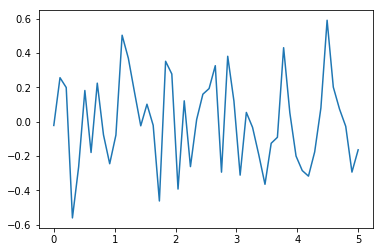

In [55]:
#Calculate R squared
residuals = y_noise - f(x, *popt)
plt.plot(x, residuals)
plt.show()

In [56]:
#Sum of the residuals squared
ss_res = np.sum(residuals**2)
#Total sum of squares
ss_tot = np.sum((y_noise-np.mean(y_noise))**2)
#R-Squared
Rsq = 1.0 - ss_res/ss_tot

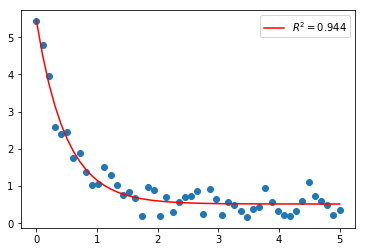

In [57]:
plt.scatter(x, y_noise)
strlabel = r'$R^2 = %0.3f$' % Rsq
plt.plot(x, f(x, *popt), color='red', label=strlabel)
plt.legend()
plt.show()

Sometimes you need to get constraints to test your physics model... and you need to be careful doing so!

In [63]:
popt2, pcov2 = curve_fit(f, x, y_noise, p0=guess, bounds=([1.0, 0.0, 0.0], [3., 1., 2.]))
#The optimised parameters of the fit
print "popt2:", popt2
#One standard deviation errors on the parameters.
perr2 = np.sqrt(np.diag(pcov2))
print "perr2:", perr
#The covar2iance matrix of the parameters
print "pcov2:", pcov2

popt2: [ 3.         1.         0.4265053]
perr2: [ 0.20374758  0.15065187  0.04866223]
pcov2: [[ 0.08680055  0.02203177 -0.00534511]
 [ 0.02203177  0.04760489  0.02236856]
 [-0.00534511  0.02236856  0.01880951]]


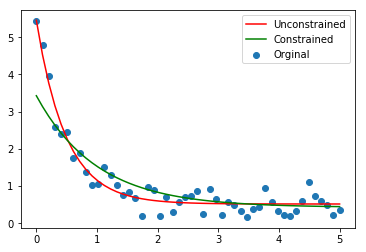

In [60]:
plt.scatter(x, y_noise, label='Orginal')
plt.plot(x, f(x, *popt), color='red', label='Unconstrained')
plt.plot(x, f(x, *popt2), color='green', label='Constrained')
plt.legend()
plt.show()

## 3.3 - Gaussian fit

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Let's create the Gaussian function
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [98]:
#Lets get unperturbed data
# Generating clean data
x = np.linspace(-5, 15, 200)
y = gauss(x, 1, 5, 2)

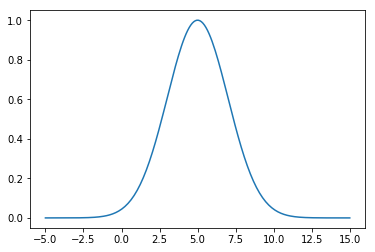

In [99]:
plt.plot(x,y)

In [110]:
yn = y + 0.1 * np.random.normal(size=len(x))

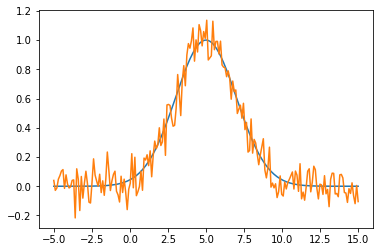

In [111]:
plt.plot(x,y)
plt.plot(x,yn)

In [112]:
popt, pcov = curve_fit(gauss, x, yn)
#The optimised parameters of the fit
print "popt:", popt
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print "perr:", perr
#The covariance matrix of the parameters
print "pcov:", pcov

popt: [ 1.02365285  4.99395765  1.92268458]
perr: [ 0.01815845  0.03938234  0.03938234]
pcov: [[  3.29729403e-04   1.67036775e-11  -4.12876103e-04]
 [  1.67036775e-11   1.55096885e-03  -3.10284367e-11]
 [ -4.12876103e-04  -3.10284367e-11   1.55096886e-03]]


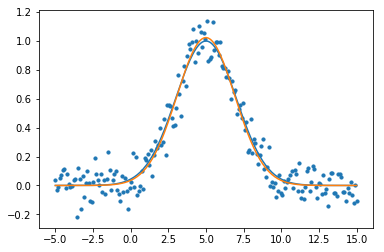

In [117]:
plt.plot(x, y, label='Original')
plt.scatter(x, yn, label='Noise',s=10)
plt.plot(x, gauss(x, *popt), label='Fit')

## 3.4 - Extra - Voigt fit

For the Spectroscopy collegues:
```bash
pip install lmfit
```

In [87]:
s = np.loadtxt('./Files/line.txt')
l = np.arange(len(s))

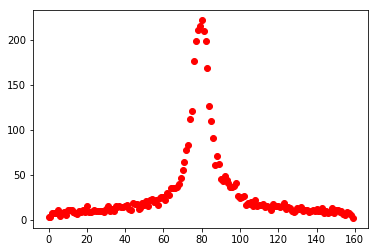

In [88]:
plt.plot(l, s, marker='o', ls='', color='r')
plt.show()

In [89]:
from lmfit.models import PseudoVoigtModel

[[Model]]
    Model(pvoigt)
[[Fit Statistics]]
    # function evals   = 76
    # data points      = 160
    # variables        = 4
    chi-square         = 10762.373
    reduced chi-square = 68.990
    Akaike info crit   = 681.382
    Bayesian info crit = 693.683
[[Variables]]
    amplitude:   4405.17037 +/- 83.84218 (1.90%) (init= 4110.24)
    sigma:       5.63702545 +/- 0.236113 (4.19%) (init= 5)
    center:      79.5249310 +/- 0.103165 (0.13%) (init= 79)
    fraction:    1.21228736 +/- 0.052351 (4.32%) (init= 0.5)
    fwhm:        11.2740509 +/- 0.472227 (4.19%)  == '2.0000000*sigma'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, fraction)           = -0.774 
    C(amplitude, fraction)       =  0.314 



(<matplotlib.figure.Figure at 0x7ff28eaf9c10>,
 <matplotlib.gridspec.GridSpec at 0x7ff28e844f10>)

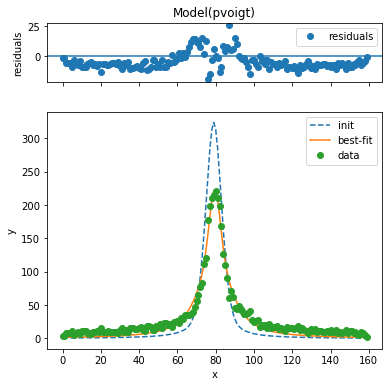

In [90]:
mod = PseudoVoigtModel()
pars = mod.guess(s, x=l)
out = mod.fit(s, pars, x=l)
print(out.fit_report(min_correl=0.25))
out.plot()